In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import time
from datetime import datetime
from pytz import timezone
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
df = pd.read_csv("Forecast.csv",parse_dates=True)

In [3]:
df.tail()

,product,date,city,sales
4795,SECF,11-01-2017,Delhi,5837
4796,SECF,12-01-2017,Delhi,7451
4797,SECF,01-01-2018,Delhi,7712
4798,SECF,02-01-2018,Delhi,31525
4799,SECF,03-01-2018,Delhi,36136


In [4]:
df['Date'] = pd.to_datetime(df['date'])

In [5]:
#df = df[df.Date < pd.to_datetime('2018-01-01')]

In [6]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [7]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [8]:
df.head()

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01


In [9]:
df.head(50)

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01
5,Mixers,09-01-2014,Mumbai,4677008,2014-09-01
6,Mixers,10-01-2014,Mumbai,4331662,2014-10-01
7,Mixers,11-01-2014,Mumbai,2184730,2014-11-01
8,Mixers,12-01-2014,Mumbai,4131878,2014-12-01
9,Mixers,01-01-2015,Mumbai,4043952,2015-01-01


In [10]:
df.set_index('Date',inplace=True)
df.head()

,product,date,city,sales
Date,,,,
2014-04-01,Mixers,04-01-2014,Mumbai,2679347
2014-05-01,Mixers,05-01-2014,Mumbai,3864612
2014-06-01,Mixers,06-01-2014,Mumbai,2932658
2014-07-01,Mixers,07-01-2014,Mumbai,3703713
2014-08-01,Mixers,08-01-2014,Mumbai,3931029


In [11]:
df.tail()

,product,date,city,sales
Date,,,,
2017-11-01,SECF,11-01-2017,Delhi,5837
2017-12-01,SECF,12-01-2017,Delhi,7451
2018-01-01,SECF,01-01-2018,Delhi,7712
2018-02-01,SECF,02-01-2018,Delhi,31525
2018-03-01,SECF,03-01-2018,Delhi,36136


In [12]:
Mum_Dry1= df[(df['city'] == 'Mumbai') & (df['product'] == 'Dry Iron')]

In [13]:
Mum_Dry1.tail()

,product,date,city,sales
Date,,,,
2017-11-01,Dry Iron,11-01-2017,Mumbai,1234741
2017-12-01,Dry Iron,12-01-2017,Mumbai,2331333
2018-01-01,Dry Iron,01-01-2018,Mumbai,2482511
2018-02-01,Dry Iron,02-01-2018,Mumbai,1500296
2018-03-01,Dry Iron,03-01-2018,Mumbai,2401173


In [14]:
Mum_Dry1.shape

(48, 4)

In [15]:
Mum_Dry= Mum_Dry1.drop('date', axis = 1)

In [16]:
Mum_Dry.head()

,product,city,sales
Date,,,
2014-04-01,Dry Iron,Mumbai,719991
2014-05-01,Dry Iron,Mumbai,1038494
2014-06-01,Dry Iron,Mumbai,788060
2014-07-01,Dry Iron,Mumbai,995257
2014-08-01,Dry Iron,Mumbai,1056341


In [17]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

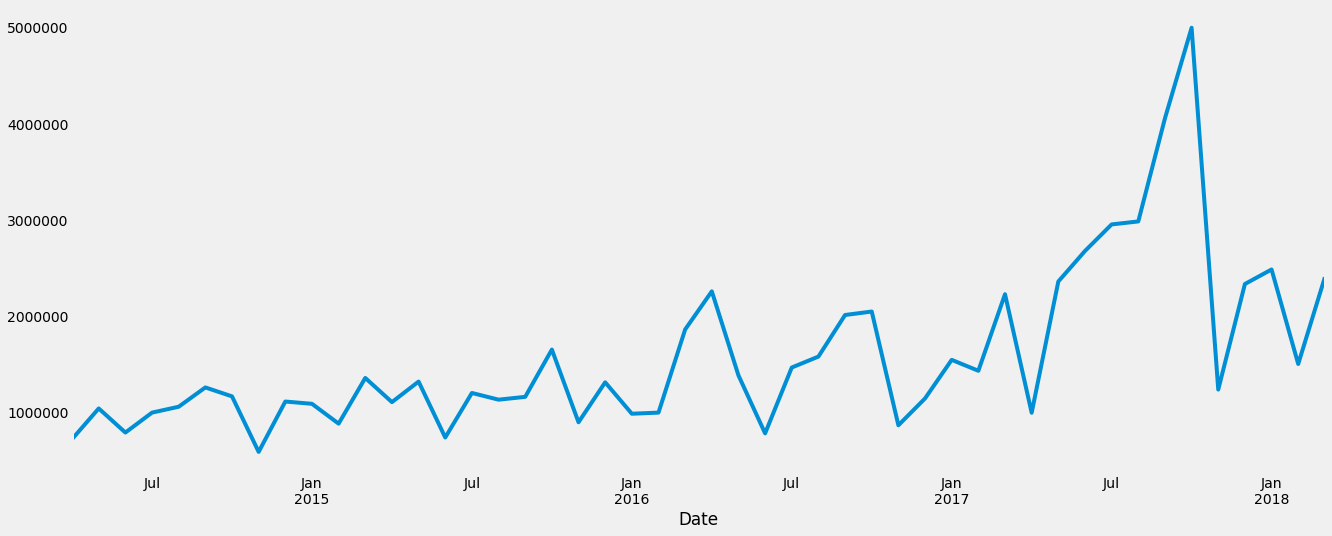

In [18]:
Mum_Dry['sales'].plot()
plt.grid();

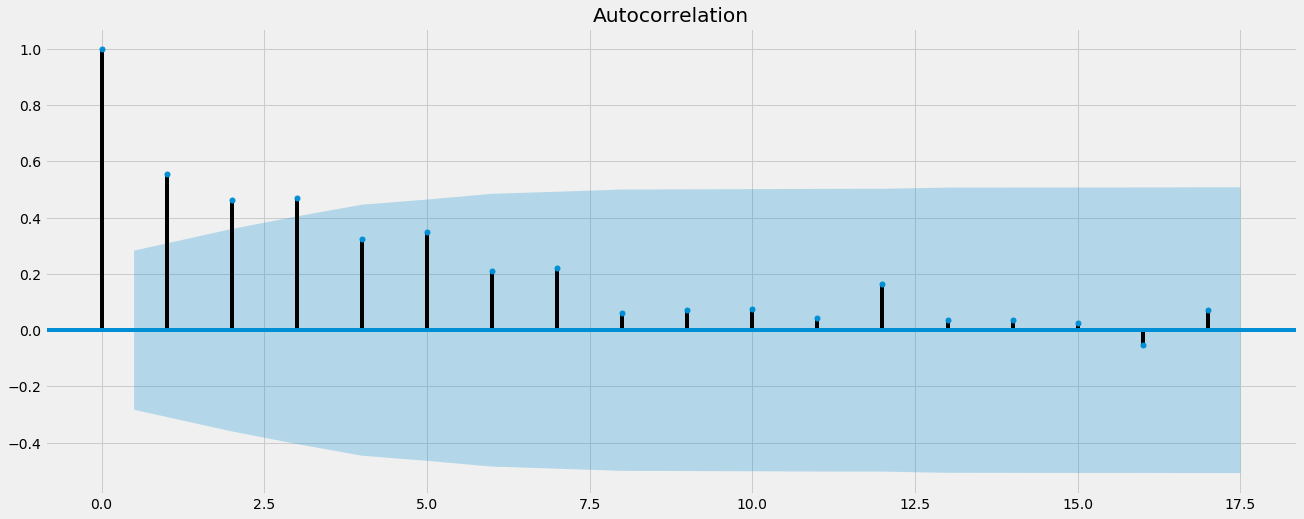

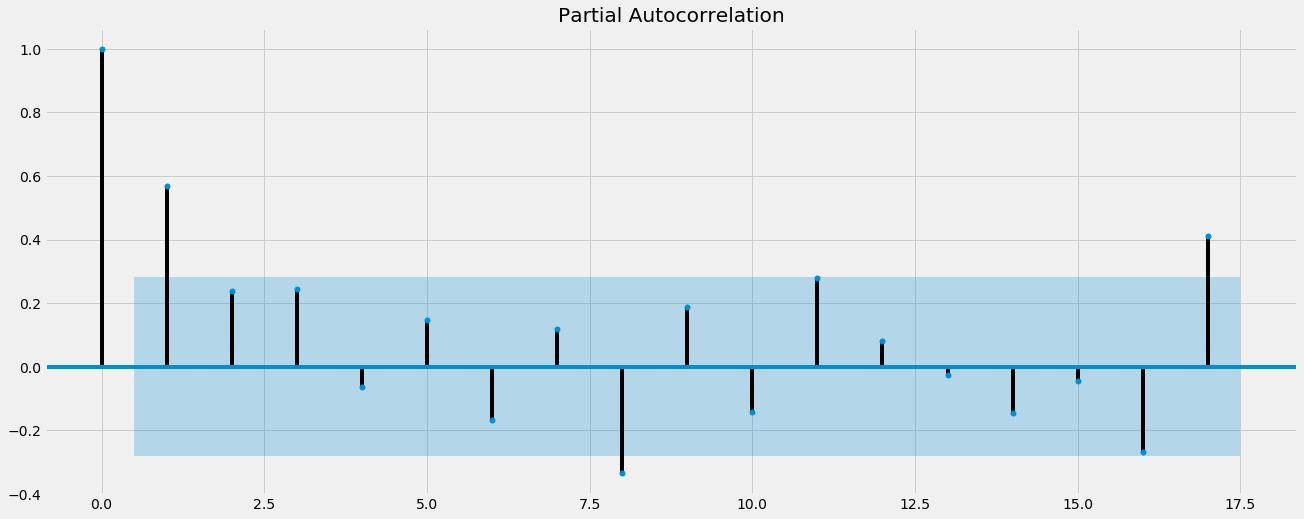

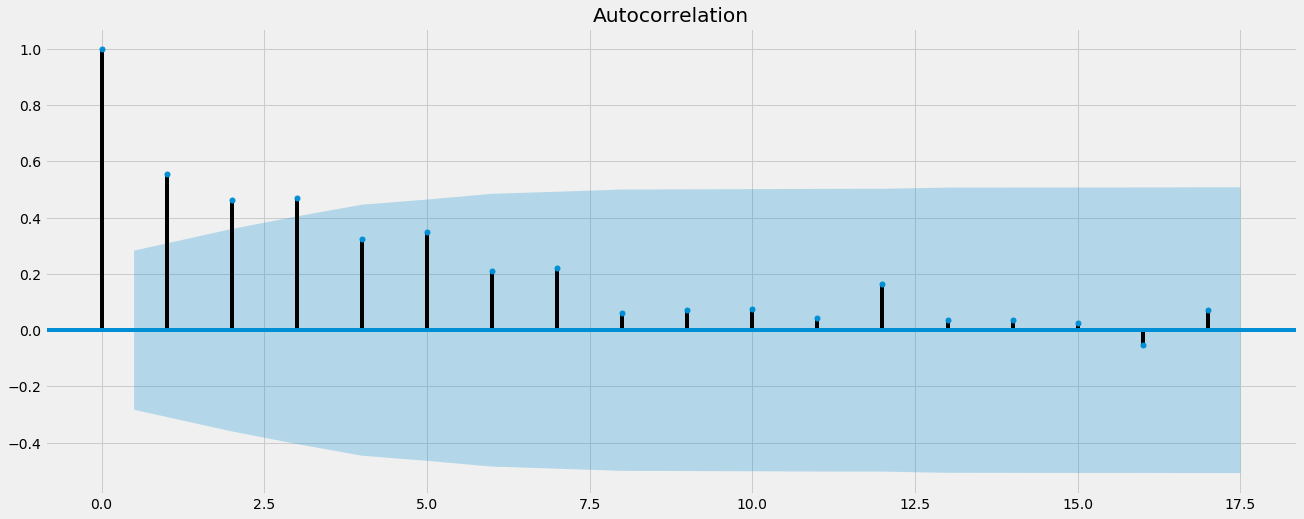

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(Mum_Dry['sales'])
plot_acf(Mum_Dry['sales'])

In [30]:
Mum_Dry.sort_index(inplace= True)

In [31]:
Mum_Dry.head()

,product,city,sales
Date,,,
2014-04-01,Dry Iron,Mumbai,719991
2014-05-01,Dry Iron,Mumbai,1038494
2014-06-01,Dry Iron,Mumbai,788060
2014-07-01,Dry Iron,Mumbai,995257
2014-08-01,Dry Iron,Mumbai,1056341


In [32]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

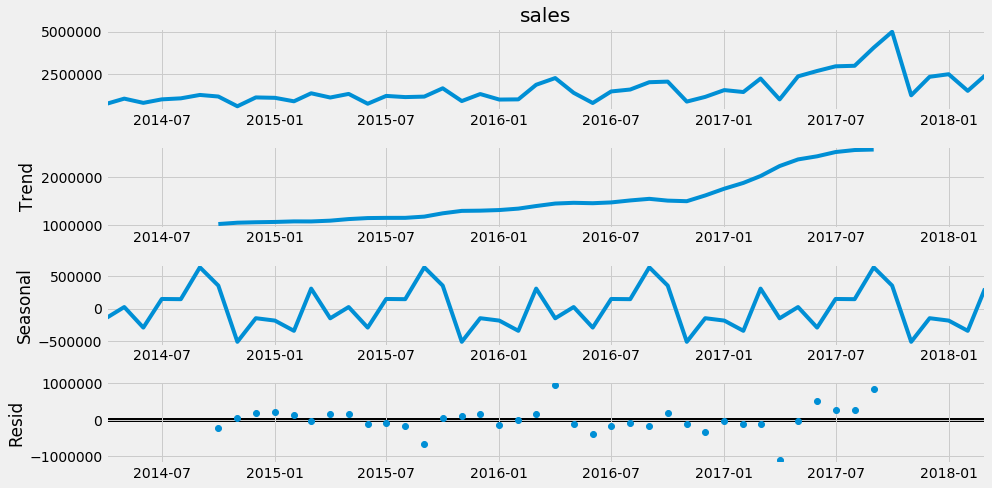

In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(Mum_Dry['sales'],model='additive')
decomposition.plot();

In [34]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    1.019256e+06
2014-11-01    1.046902e+06
2014-12-01    1.056397e+06
2015-01-01    1.062761e+06
2015-02-01    1.074319e+06
2015-03-01    1.073298e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01   -147488.702546
2014-05-01     25069.047454
2014-06-01   -289640.549769
2014-07-01    148292.380787
2014-08-01    145321.491898
2014-09-01    633012.283565
2014-10-01    352916.158565
2014-11-01   -507131.952546
2014-12-01   -145936.966435
2015-01-01   -182352.952546
2015-02-01   -338981.146991
2015-03-01    306920.908565
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01   -208173.491898
2014-11-01     47308.077546
2014-

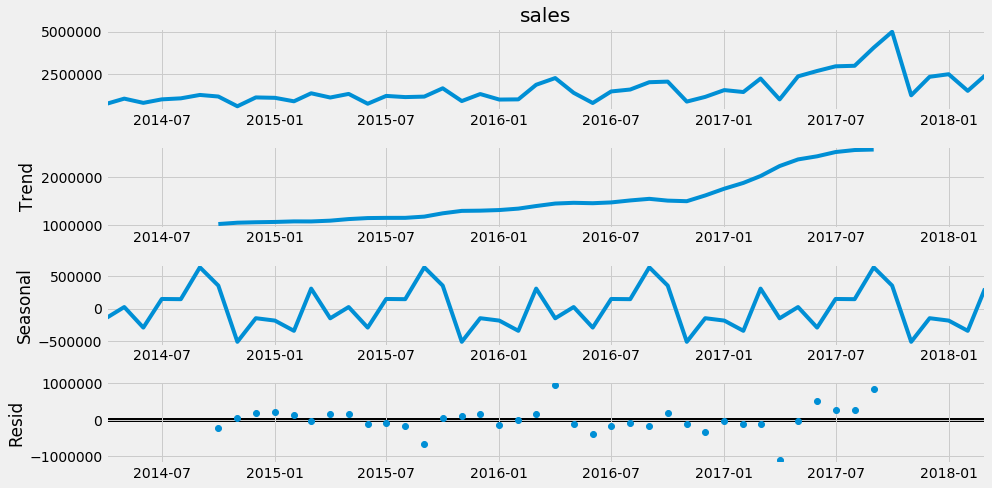

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(Mum_Dry['sales'],model='Multiplicative')
decomposition.plot();

In [36]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    1.019256e+06
2014-11-01    1.046902e+06
2014-12-01    1.056397e+06
2015-01-01    1.062761e+06
2015-02-01    1.074319e+06
2015-03-01    1.073298e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01   -147488.702546
2014-05-01     25069.047454
2014-06-01   -289640.549769
2014-07-01    148292.380787
2014-08-01    145321.491898
2014-09-01    633012.283565
2014-10-01    352916.158565
2014-11-01   -507131.952546
2014-12-01   -145936.966435
2015-01-01   -182352.952546
2015-02-01   -338981.146991
2015-03-01    306920.908565
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01   -208173.491898
2014-11-01     47308.077546
2014-

In [37]:
Mum_Dry.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-04-01 to 2018-03-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  48 non-null     object
 1   city     48 non-null     object
 2   sales    48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [38]:
train    =   Mum_Dry[0:int(len(Mum_Dry)*0.7)] 
test     =  Mum_Dry[int(len(Mum_Dry)*0.7):]

In [39]:
train.shape

(33, 3)

In [40]:
test.shape

(15, 3)

In [41]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,product,city,sales
Date,,,
2014-04-01,Dry Iron,Mumbai,719991
2014-05-01,Dry Iron,Mumbai,1038494
2014-06-01,Dry Iron,Mumbai,788060
2014-07-01,Dry Iron,Mumbai,995257
2014-08-01,Dry Iron,Mumbai,1056341


Last few rows of Training Data


,product,city,sales
Date,,,
2016-08-01,Dry Iron,Mumbai,1577427
2016-09-01,Dry Iron,Mumbai,2009596
2016-10-01,Dry Iron,Mumbai,2045396
2016-11-01,Dry Iron,Mumbai,863705
2016-12-01,Dry Iron,Mumbai,1142563


First few rows of Test Data


,product,city,sales
Date,,,
2017-01-01,Dry Iron,Mumbai,1543478
2017-02-01,Dry Iron,Mumbai,1429819
2017-03-01,Dry Iron,Mumbai,2225589
2017-04-01,Dry Iron,Mumbai,993482
2017-05-01,Dry Iron,Mumbai,2357459


Last few rows of Test Data


,product,city,sales
Date,,,
2017-11-01,Dry Iron,Mumbai,1234741
2017-12-01,Dry Iron,Mumbai,2331333
2018-01-01,Dry Iron,Mumbai,2482511
2018-02-01,Dry Iron,Mumbai,1500296
2018-03-01,Dry Iron,Mumbai,2401173


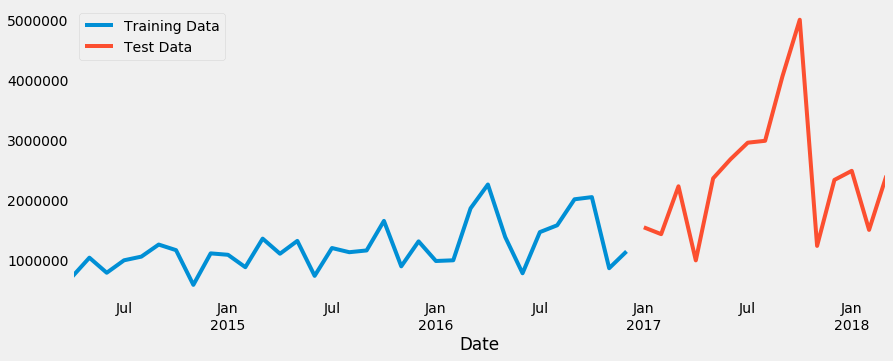

In [42]:
train['sales'].plot(figsize=(13,5), fontsize=14)
test['sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [43]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [44]:
from sklearn import metrics

Simpleaverage

In [45]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [46]:
SimpleAverage_test['mean_forecast'] = train['sales'].mean()
SimpleAverage_test.head()

,product,city,sales,mean_forecast
Date,,,,
2017-01-01,Dry Iron,Mumbai,1543478,1.209027e+06
2017-02-01,Dry Iron,Mumbai,1429819,1.209027e+06
2017-03-01,Dry Iron,Mumbai,2225589,1.209027e+06
2017-04-01,Dry Iron,Mumbai,993482,1.209027e+06
2017-05-01,Dry Iron,Mumbai,2357459,1.209027e+06


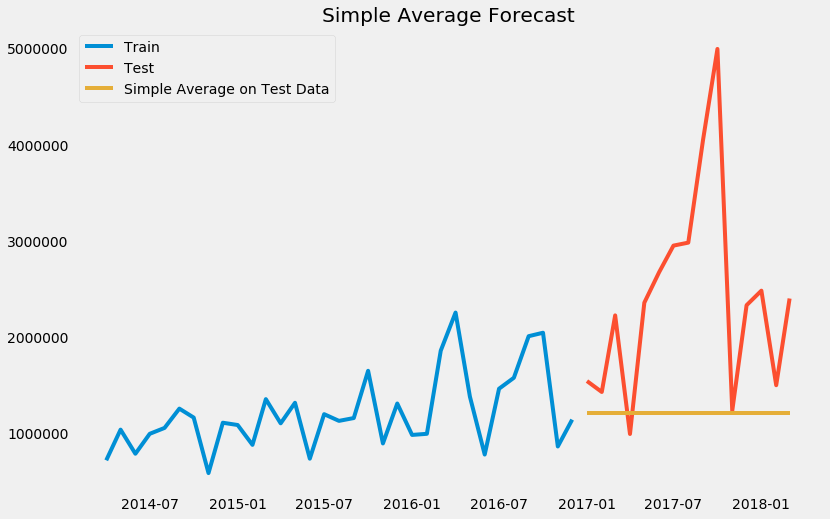

In [47]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['sales'], label='Train')
plt.plot(SimpleAverage_test['sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [48]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1585002.901


In [49]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf

,Test RMSE
Simple Average,1.585003e+06


In [50]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Simple average

In [51]:
SES_train = train.copy()
SES_test = test.copy()

In [52]:
model_SES = SimpleExpSmoothing(SES_train['sales'])

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [53]:
model_SES_autofit = model_SES.fit(optimized=True)

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [54]:
model_SES_autofit.params

{'smoothing_level': 0.20069767441860464,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 719991.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [55]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,product,city,sales,predict
Date,,,,
2017-01-01,Dry Iron,Mumbai,1543478,1.402945e+06
2017-02-01,Dry Iron,Mumbai,1429819,1.402945e+06
2017-03-01,Dry Iron,Mumbai,2225589,1.402945e+06
2017-04-01,Dry Iron,Mumbai,993482,1.402945e+06
2017-05-01,Dry Iron,Mumbai,2357459,1.402945e+06


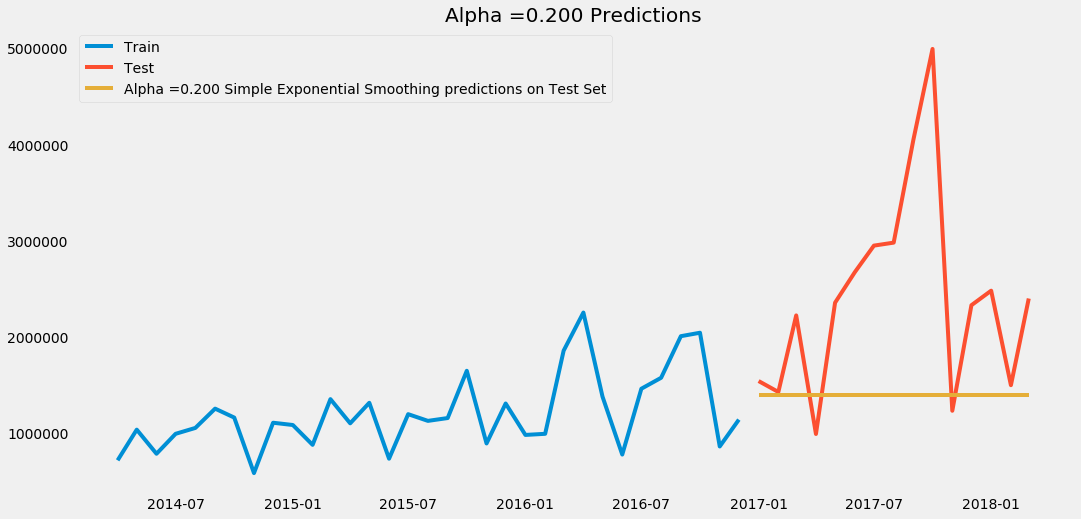

In [57]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.200 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.200 Predictions');

In [59]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['sales'],SES_test['predict'],squared=False)
print("For Alpha =0.200 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.200 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1443595.817


In [60]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [61]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict'])
print('\nMAPE:',mape)


MAPE: 37.65855331256535


In [62]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape] },index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,1.585003e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",1.443596e+06,37.658553


In [63]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [64]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [65]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
1,0.2,387212.796520,1.443572e+06
2,0.3,392559.631806,1.464533e+06
0,0.1,404819.309841,1.485221e+06
3,0.4,401919.929307,1.503416e+06
4,0.5,411796.252589,1.547190e+06
5,0.6,421352.460174,1.588711e+06
6,0.7,430641.666868,1.622325e+06
7,0.8,440153.730366,1.643360e+06
8,0.9,450575.245166,1.648493e+06


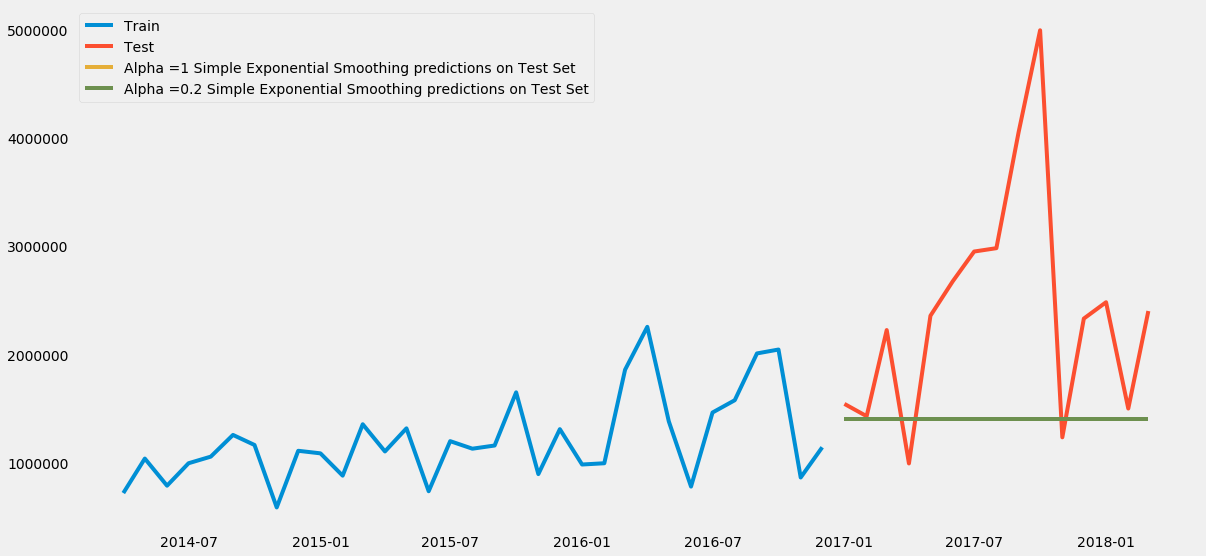

In [66]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [67]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict',0.1])
print('\nMAPE:',mape)


MAPE: 39.15372735754302


In [68]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.2,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,1.585003e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",1.443596e+06,37.658553
"Alpha=0.2,SimpleExponentialSmoothing",1.443572e+06,39.153727


Double

In [69]:
DES_train = train.copy()
DES_test = test.copy()

In [70]:
model_DES = Holt(DES_train['sales'])

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [71]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [72]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend = j, optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [73]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1.200153e+06,1.392300e+06
1,0.1,0.2,8.840718e+05,1.675101e+06
2,0.1,0.3,7.694654e+05,1.190021e+06
3,0.1,0.4,6.986201e+05,1.027847e+06
4,0.1,0.5,6.515407e+05,1.038565e+06
...,...,...,...,...
95,1.0,0.6,6.140606e+05,2.333444e+06
96,1.0,0.7,6.423539e+05,1.932656e+06
97,1.0,0.8,6.726061e+05,1.394054e+06
98,1.0,0.9,7.054249e+05,1.084231e+06


In [74]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
3,0.1,0.4,698620.051489,1.027847e+06
4,0.1,0.5,651540.739544,1.038565e+06
98,1.0,0.9,705424.860025,1.084231e+06
2,0.1,0.3,769465.442754,1.190021e+06
5,0.1,0.6,616138.623549,1.206284e+06


In [75]:
mape = mean_absolute_percentage_error(DES_test['sales'],DES_test['predict',0.6,0.8])
print('\nMAPE:',mape)


MAPE: 188.70760042052137


In [76]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,1.585003e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",1.443596e+06,37.658553
"Alpha=0.2,SimpleExponentialSmoothing",1.443572e+06,39.153727
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",1.027847e+06,188.707600


In [77]:
TES_train = train.copy()
TES_test = test.copy()

In [78]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['sales'],trend='additive',seasonal='Multiplicative',initialization_method='estimated')

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [79]:
model_TES_autofit = model_TES.fit()

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [80]:
model_TES_autofit.params

{'smoothing_level': 0.005,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.0001,
 'damping_trend': nan,
 'initial_level': 1008838.1999999995,
 'initial_trend': 13601.484090909158,
 'initial_seasons': array([1.03898828, 1.20329709, 0.66029481, 1.07116174, 1.00850054,
        1.01198006, 1.17066044, 0.57484609, 1.07740756, 1.04816644,
        0.84021016, 1.29448682]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,product,city,sales,auto_predict
Date,,,,
2017-01-01,Dry Iron,Mumbai,1543478,1.539465e+06
2017-02-01,Dry Iron,Mumbai,1429819,1.245485e+06
2017-03-01,Dry Iron,Mumbai,2225589,1.936521e+06
2017-04-01,Dry Iron,Mumbai,993482,1.568467e+06
2017-05-01,Dry Iron,Mumbai,2357459,1.832766e+06


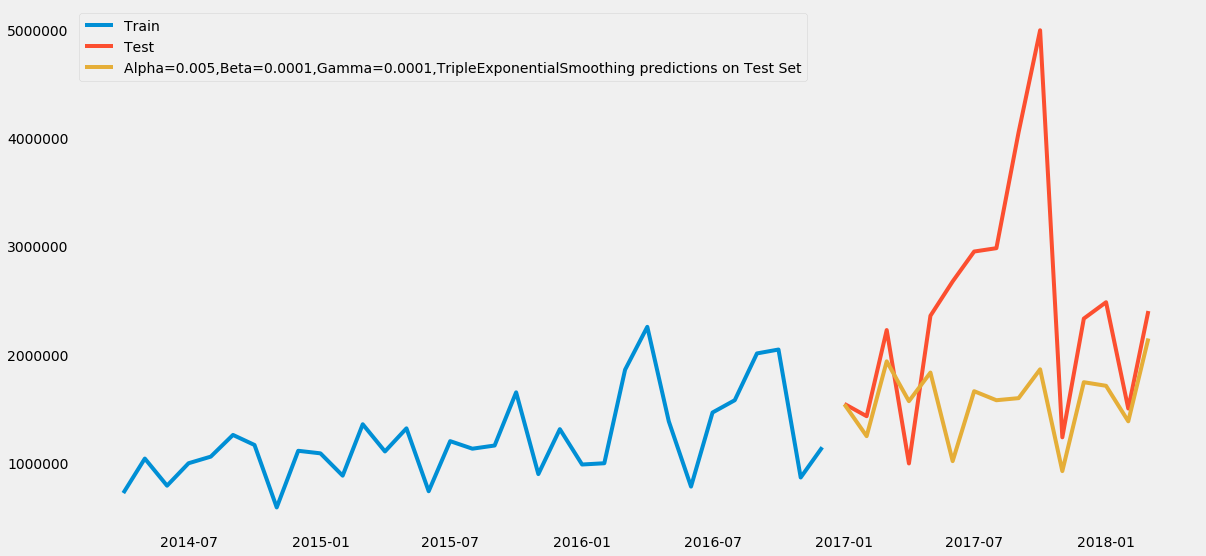

In [82]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['sales'], label='Train')
plt.plot(TES_test['sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [83]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['sales'],TES_test['auto_predict'],squared=False)
print("Forlabel='Alpha=0.005,Beta=0.0001,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Forlabel='Alpha=0.005,Beta=0.0001,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 1266728.704


In [84]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['auto_predict'])
print('\nMAPE:',mape)


MAPE: 32.162830806126266


In [85]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1], 'Test MAPE' : [mape]}
                           ,index=['Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,1.585003e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",1.443596e+06,37.658553
"Alpha=0.2,SimpleExponentialSmoothing",1.443572e+06,39.153727
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",1.027847e+06,188.707600
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.266729e+06,32.162831


In [86]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [87]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [88]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,2.623724e+05,1.161343e+06
1,0.1,0.1,0.2,2.630899e+05,1.154784e+06
2,0.1,0.1,0.3,2.640201e+05,1.153537e+06
3,0.1,0.1,0.4,2.650371e+05,1.157035e+06
4,0.1,0.1,0.5,2.660658e+05,1.164565e+06
...,...,...,...,...,...
995,1.0,1.0,0.6,1.365119e+06,1.068991e+07
996,1.0,1.0,0.7,5.259563e+06,2.494099e+07
997,1.0,1.0,0.8,5.189949e+06,1.779782e+07
998,1.0,1.0,0.9,3.725629e+06,2.652033e+07


In [89]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
20,0.1,0.3,0.1,263563.266831,1.099512e+06
10,0.1,0.2,0.1,262999.383237,1.107594e+06
11,0.1,0.2,0.2,263814.732426,1.109416e+06
21,0.1,0.3,0.2,264565.696194,1.109728e+06
12,0.1,0.2,0.3,264918.008069,1.116922e+06


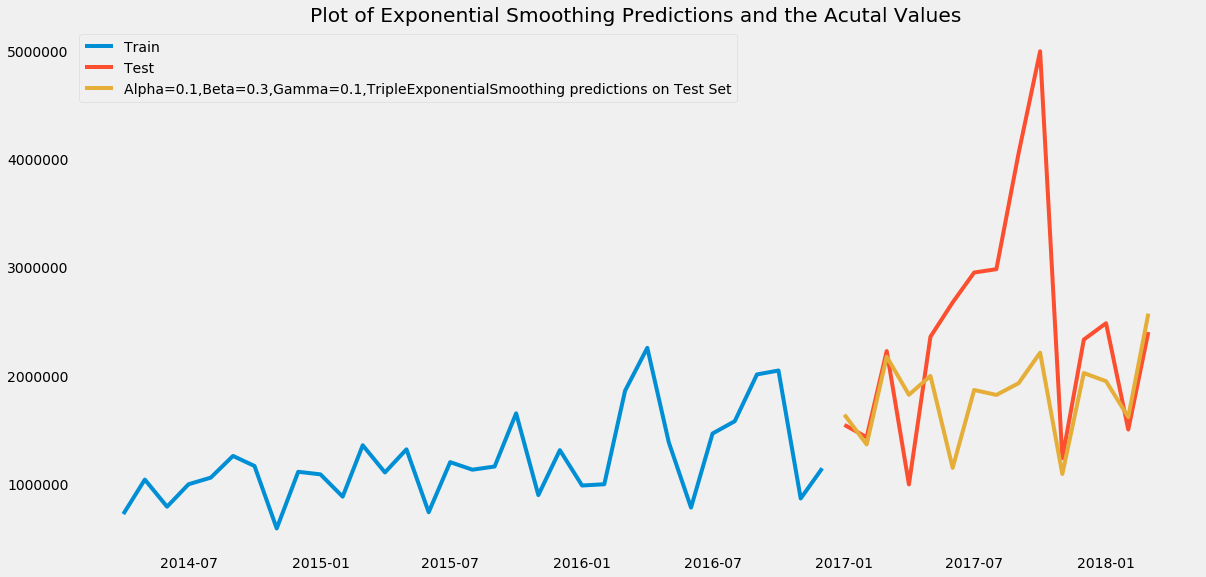

In [92]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')


plt.plot(TES_test['predict', 0.1000000000000000, 0.2000000000000000, 0.1], label='Alpha=0.1,Beta=0.3,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [94]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['predict',0.1,0.2,0.1])
print('\nMAPE:',mape)


MAPE: 27.613087232603117


In [95]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
Simple Average,1.585003e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",1.443596e+06,37.658553
"Alpha=0.2,SimpleExponentialSmoothing",1.443572e+06,39.153727
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",1.027847e+06,188.707600
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.266729e+06,32.162831
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",1.099512e+06,27.613087


In [96]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Test MAPE
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",1.027847e+06,188.707600
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",1.099512e+06,27.613087
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.266729e+06,32.162831
"Alpha=0.2,SimpleExponentialSmoothing",1.443572e+06,39.153727
"Alpha=0.995,SimpleExponentialSmoothing",1.443596e+06,37.658553
Simple Average,1.585003e+06,NaN


In [97]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

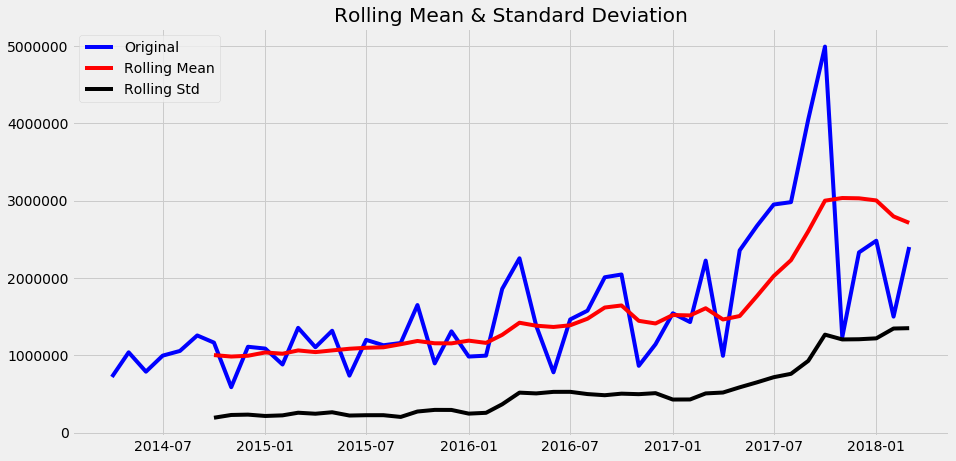

Results of Dickey-Fuller Test:
Test Statistic                 -3.532554
p-value                         0.007189
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64 



In [98]:
test_stationarity(Mum_Dry['sales'])

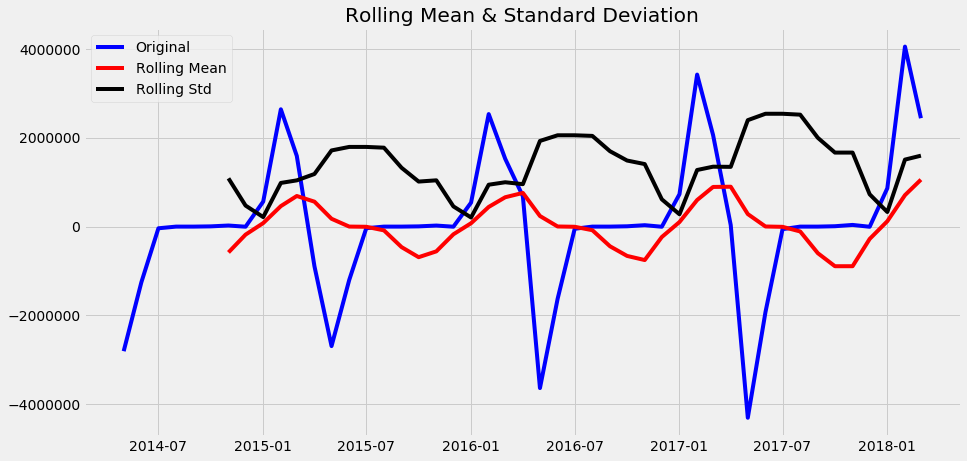

Results of Dickey-Fuller Test:
Test Statistic                -1.129507e+01
p-value                        1.350032e-20
#Lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64 



In [241]:
#test_stationarity(Ahm_Coo['sales'].diff().dropna())

In [242]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [243]:
test.dropna(inplace=True)

In [244]:
test = test.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [245]:
from statsmodels.tsa.stattools import adfuller

In [99]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 0, 0)
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)


In [100]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [101]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 0, 0) - AIC:1031.3041902251243
ARIMA(0, 0, 1) - AIC:946.7012345514531
ARIMA(0, 0, 2) - AIC:948.7690024979458
ARIMA(0, 0, 3) - AIC:951.1079245873937
ARIMA(1, 0, 0) - AIC:947.0706124743439
ARIMA(1, 0, 1) - AIC:946.4073359994215
ARIMA(1, 0, 2) - AIC:947.8493311480281
ARIMA(1, 0, 3) - AIC:947.1484362912989
ARIMA(2, 0, 0) - AIC:948.7354126599272
ARIMA(2, 0, 1) - AIC:948.1780274585717
ARIMA(2, 0, 2) - AIC:948.8143840479956
ARIMA(2, 0, 3) - AIC:948.1156754093488
ARIMA(3, 0, 0) - AIC:950.7196137135351
ARIMA(3, 0, 1) - AIC:950.0987137004897
ARIMA(3, 0, 2) - AIC:950.5657869333472
ARIMA(3, 0, 3) - AIC:949.2405706950045


In [102]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
5,"(1, 0, 1)",946.407336
1,"(0, 0, 1)",946.701235
4,"(1, 0, 0)",947.070612
7,"(1, 0, 3)",947.148436
6,"(1, 0, 2)",947.849331


In [103]:
auto_ARIMA = ARIMA(train['sales'], order=(1,0,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   33
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -469.204
Date:                Sat, 21 Aug 2021   AIC                            946.407
Time:                        09:58:54   BIC                            952.393
Sample:                    04-01-2014   HQIC                           948.421
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.209e+06   1.03e+05     11.682      0.000    1.01e+06    1.41e+06
ar.L1         -0.5394      0.333     -1.619      0.106      -1.192       0.114
ma.L1          0.9749      0.335      2.906      0.0

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


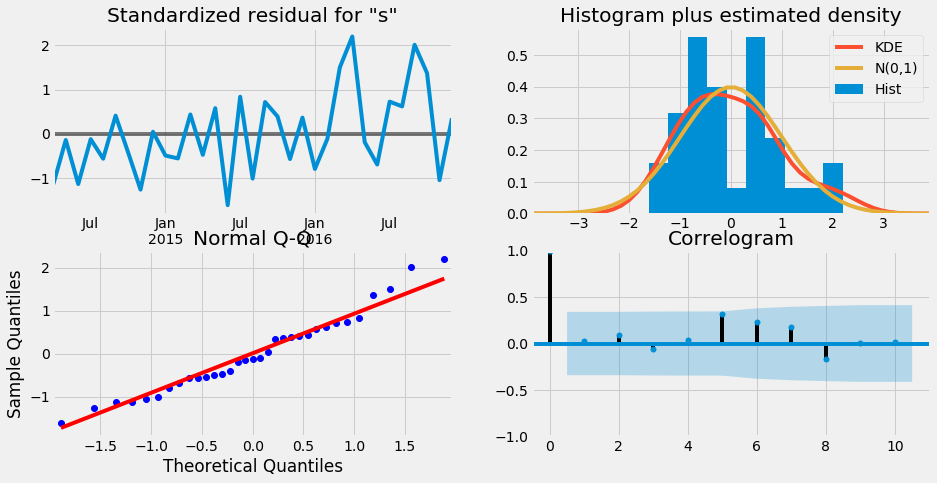

In [104]:
results_auto_ARIMA.plot_diagnostics();

In [105]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [106]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [107]:
rmse = mean_squared_error(test['sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1581636.0492496178 
MAPE: 42.22277234038418


In [108]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [resultsDf_8_3.sort_values(by=['Test RMSE']).values[0][1]],'Test MAPE':[mape]}
                           ,index=['ARIMA(1,0,1)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

,Test RMSE,Test MAPE
Simple Average,1.585003e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",1.443596e+06,37.658553
"Alpha=0.2,SimpleExponentialSmoothing",1.443572e+06,39.153727
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",1.027847e+06,188.707600
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.266729e+06,32.162831
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",1.099512e+06,27.613087
"ARIMA(1,0,1)",2.761309e+01,42.222772


In [110]:
import itertools
p = q = range(0, 4)
d= range(0,1)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 0, 3)(0, 0, 3, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 0, 3)(1, 0, 3, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 0, 3)(2, 0, 3, 12)
Model: (3, 0, 0)(3, 0, 0, 12)
Model: (3, 0, 1)(3, 0, 1, 12)
Model: (3, 0, 2)(3, 0, 2, 12)
Model: (3, 0, 3)(3, 0, 3, 12)


In [111]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [114]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:993.0544455581837
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:656.0497066450694
SARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:229.7565356551608
SARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:8.0
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:595.1157319512421
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:570.1692194004388


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:231.75653418992312
SARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:10.0
SARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:264.03575412881366
SARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:259.4652101777566


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:233.75650771367893
SARIMA(0, 0, 0)x(2, 0, 3, 12)12 - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:8.0
SARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 0)x(3, 0, 2, 12)12 - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:945.0401508633571
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:578.6991275374633
SARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:217.91413347232518


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 1)x(0, 0, 3, 12)12 - AIC:10.0
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:636.4175148367992
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:578.4114823362866
SARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:219.8495404700626


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 1)x(1, 0, 3, 12)12 - AIC:12.0
SARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:277.86528935908603
SARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:279.8640934241581


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:221.84710843218085
SARIMA(0, 0, 1)x(2, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 1)x(3, 0, 0, 12)12 - AIC:10.0
SARIMA(0, 0, 1)x(3, 0, 1, 12)12 - AIC:12.0
SARIMA(0, 0, 1)x(3, 0, 2, 12)12 - AIC:14.0
SARIMA(0, 0, 1)x(3, 0, 3, 12)12 - AIC:16.0
SARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:915.9166288618884


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:551.4498296498314
SARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:190.44800467691584
SARIMA(0, 0, 2)x(0, 0, 3, 12)12 - AIC:12.0
SARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:640.2356391541447


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:551.8862339702835


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:192.3803415280316
SARIMA(0, 0, 2)x(1, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:280.6252143822455
SARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:282.6251937147364


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:194.3974495504799
SARIMA(0, 0, 2)x(2, 0, 3, 12)12 - AIC:16.0
SARIMA(0, 0, 2)x(3, 0, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 2)x(3, 0, 1, 12)12 - AIC:14.0
SARIMA(0, 0, 2)x(3, 0, 2, 12)12 - AIC:16.0
SARIMA(0, 0, 2)x(3, 0, 3, 12)12 - AIC:18.0
SARIMA(0, 0, 3)x(0, 0, 0, 12)12 - AIC:886.8338285165358


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 3)x(0, 0, 1, 12)12 - AIC:523.5855674193986
SARIMA(0, 0, 3)x(0, 0, 2, 12)12 - AIC:162.63884674303415


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 3)x(0, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 3)x(1, 0, 0, 12)12 - AIC:643.5563700387294
SARIMA(0, 0, 3)x(1, 0, 1, 12)12 - AIC:524.8893566080831


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 3)x(1, 0, 2, 12)12 - AIC:164.6388580927503
SARIMA(0, 0, 3)x(1, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 3)x(2, 0, 0, 12)12 - AIC:283.2160829732468
SARIMA(0, 0, 3)x(2, 0, 1, 12)12 - AIC:285.2470969291183


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 3)x(2, 0, 2, 12)12 - AIC:166.6388384384416
SARIMA(0, 0, 3)x(2, 0, 3, 12)12 - AIC:18.0
SARIMA(0, 0, 3)x(3, 0, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 3)x(3, 0, 1, 12)12 - AIC:16.0
SARIMA(0, 0, 3)x(3, 0, 2, 12)12 - AIC:18.0
SARIMA(0, 0, 3)x(3, 0, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:929.7865458052283
SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:580.8344858781605
SARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:233.75605914239372
SARIMA(1, 0, 0)x(0, 0, 3, 12)12 - AIC:10.0
SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:573.8020215247668


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:575.3226000871323
SARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:235.75605640571808
SARIMA(1, 0, 0)x(1, 0, 3, 12)12 - AIC:12.0
SARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:233.7560275659808


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:235.75602756394386
SARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:237.7560351284871
SARIMA(1, 0, 0)x(2, 0, 3, 12)12 - AIC:14.0
SARIMA(1, 0, 0)x(3, 0, 0, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 0)x(3, 0, 1, 12)12 - AIC:12.0
SARIMA(1, 0, 0)x(3, 0, 2, 12)12 - AIC:14.0
SARIMA(1, 0, 0)x(3, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:891.1594816928399
SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:549.9701697537944
SARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:206.47983034580523


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 1)x(0, 0, 3, 12)12 - AIC:12.0
SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:574.4265781057414


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:548.6779982582492


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:207.98892518969296
SARIMA(1, 0, 1)x(1, 0, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:234.96121251049618


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:236.88158683159017


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:210.56375380272533
SARIMA(1, 0, 1)x(2, 0, 3, 12)12 - AIC:16.0
SARIMA(1, 0, 1)x(3, 0, 0, 12)12 - AIC:12.0
SARIMA(1, 0, 1)x(3, 0, 1, 12)12 - AIC:14.0
SARIMA(1, 0, 1)x(3, 0, 2, 12)12 - AIC:16.0
SARIMA(1, 0, 1)x(3, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:862.06198618092
SARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:518.7287963893186


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:177.78944939476006
SARIMA(1, 0, 2)x(0, 0, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:570.9445960012703
SARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:519.3766903674216


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:182.6874905609663
SARIMA(1, 0, 2)x(1, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:235.6835891191758


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:238.6660460005382


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:181.5167760016409
SARIMA(1, 0, 2)x(2, 0, 3, 12)12 - AIC:18.0
SARIMA(1, 0, 2)x(3, 0, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 2)x(3, 0, 1, 12)12 - AIC:16.0
SARIMA(1, 0, 2)x(3, 0, 2, 12)12 - AIC:18.0
SARIMA(1, 0, 2)x(3, 0, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 3)x(0, 0, 0, 12)12 - AIC:830.6838168188026
SARIMA(1, 0, 3)x(0, 0, 1, 12)12 - AIC:489.6538926879204


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 3)x(0, 0, 2, 12)12 - AIC:151.8630011934979
SARIMA(1, 0, 3)x(0, 0, 3, 12)12 - AIC:16.0
SARIMA(1, 0, 3)x(1, 0, 0, 12)12 - AIC:574.434067773979


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 0, 3)x(1, 0, 1, 12)12 - AIC:492.1022136198268


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 3)x(1, 0, 2, 12)12 - AIC:156.5855325443966
SARIMA(1, 0, 3)x(1, 0, 3, 12)12 - AIC:18.0
SARIMA(1, 0, 3)x(2, 0, 0, 12)12 - AIC:239.5566600404001


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 3)x(2, 0, 1, 12)12 - AIC:243.59491693254645


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 3)x(2, 0, 2, 12)12 - AIC:159.39024990355662
SARIMA(1, 0, 3)x(2, 0, 3, 12)12 - AIC:20.0
SARIMA(1, 0, 3)x(3, 0, 0, 12)12 - AIC:16.0
SARIMA(1, 0, 3)x(3, 0, 1, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 3)x(3, 0, 2, 12)12 - AIC:20.0
SARIMA(1, 0, 3)x(3, 0, 3, 12)12 - AIC:22.0
SARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:901.0413520256792
SARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:582.5010073891801


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:234.25409289935058
SARIMA(2, 0, 0)x(0, 0, 3, 12)12 - AIC:12.0
SARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:546.0620107022204
SARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:547.3552358238173


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:236.25409274483582
SARIMA(2, 0, 0)x(1, 0, 3, 12)12 - AIC:14.0
SARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:206.34799225457456


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:208.34799742137054
SARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:210.3480008991391
SARIMA(2, 0, 0)x(2, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(3, 0, 0, 12)12 - AIC:12.0
SARIMA(2, 0, 0)x(3, 0, 1, 12)12 - AIC:14.0
SARIMA(2, 0, 0)x(3, 0, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 0)x(3, 0, 3, 12)12 - AIC:18.0
SARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:894.4904640547533


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:556.3399257736486
SARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:208.3958898416093
SARIMA(2, 0, 1)x(0, 0, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:547.9888623226942


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:551.2834724964949


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:210.42890817785144
SARIMA(2, 0, 1)x(1, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:207.53246568661106


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:210.45029752971035


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:215.42544436364483
SARIMA(2, 0, 1)x(2, 0, 3, 12)12 - AIC:18.0
SARIMA(2, 0, 1)x(3, 0, 0, 12)12 - AIC:14.0
SARIMA(2, 0, 1)x(3, 0, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(3, 0, 2, 12)12 - AIC:18.0
SARIMA(2, 0, 1)x(3, 0, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:863.9639198101579


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:523.1263646947509


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:180.68477933229872
SARIMA(2, 0, 2)x(0, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:545.7667044344937
SARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:523.6781223231403


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:181.84337641825272
SARIMA(2, 0, 2)x(1, 0, 3, 12)12 - AIC:18.0
SARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:206.6654445237238


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:208.52784905630105


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:185.31030987750398
SARIMA(2, 0, 2)x(2, 0, 3, 12)12 - AIC:20.0
SARIMA(2, 0, 2)x(3, 0, 0, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 2)x(3, 0, 1, 12)12 - AIC:18.0
SARIMA(2, 0, 2)x(3, 0, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(3, 0, 3, 12)12 - AIC:22.0
SARIMA(2, 0, 3)x(0, 0, 0, 12)12 - AIC:830.4754330908357


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(2, 0, 3)x(0, 0, 1, 12)12 - AIC:490.7723360222111
SARIMA(2, 0, 3)x(0, 0, 2, 12)12 - AIC:153.82890895470933
SARIMA(2, 0, 3)x(0, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:542.6398909958348


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 3)x(1, 0, 1, 12)12 - AIC:495.4279241332705


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 3)x(1, 0, 2, 12)12 - AIC:155.82927132196932
SARIMA(2, 0, 3)x(1, 0, 3, 12)12 - AIC:20.0
SARIMA(2, 0, 3)x(2, 0, 0, 12)12 - AIC:212.13826546284884


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 3)x(2, 0, 1, 12)12 - AIC:213.73442811224538


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 3)x(2, 0, 2, 12)12 - AIC:160.843532108612
SARIMA(2, 0, 3)x(2, 0, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 3)x(3, 0, 0, 12)12 - AIC:18.0
SARIMA(2, 0, 3)x(3, 0, 1, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 3)x(3, 0, 2, 12)12 - AIC:22.0
SARIMA(2, 0, 3)x(3, 0, 3, 12)12 - AIC:24.0
SARIMA(3, 0, 0)x(0, 0, 0, 12)12 - AIC:871.8687247827124
SARIMA(3, 0, 0)x(0, 0, 1, 12)12 - AIC:582.9534961730593


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 0)x(0, 0, 2, 12)12 - AIC:235.70044874328266
SARIMA(3, 0, 0)x(0, 0, 3, 12)12 - AIC:14.0
SARIMA(3, 0, 0)x(1, 0, 0, 12)12 - AIC:517.8543066764587


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 0)x(1, 0, 1, 12)12 - AIC:518.5515199832129
SARIMA(3, 0, 0)x(1, 0, 2, 12)12 - AIC:237.70044599697513


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 0)x(1, 0, 3, 12)12 - AIC:16.0
SARIMA(3, 0, 0)x(2, 0, 0, 12)12 - AIC:179.462681727019


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 0)x(2, 0, 1, 12)12 - AIC:181.46268273441757
SARIMA(3, 0, 0)x(2, 0, 2, 12)12 - AIC:183.46268891423068


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 0)x(2, 0, 3, 12)12 - AIC:18.0
SARIMA(3, 0, 0)x(3, 0, 0, 12)12 - AIC:14.0
SARIMA(3, 0, 0)x(3, 0, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 0)x(3, 0, 2, 12)12 - AIC:18.0
SARIMA(3, 0, 0)x(3, 0, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 1)x(0, 0, 0, 12)12 - AIC:862.1402365742767
SARIMA(3, 0, 1)x(0, 0, 1, 12)12 - AIC:555.7496375745274
SARIMA(3, 0, 1)x(0, 0, 2, 12)12 - AIC:209.9247141914716


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 1)x(0, 0, 3, 12)12 - AIC:16.0
SARIMA(3, 0, 1)x(1, 0, 0, 12)12 - AIC:520.0979057353692


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 1)x(1, 0, 1, 12)12 - AIC:520.8213664455259


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 0, 1)x(1, 0, 2, 12)12 - AIC:211.43468257730902
SARIMA(3, 0, 1)x(1, 0, 3, 12)12 - AIC:18.0
SARIMA(3, 0, 1)x(2, 0, 0, 12)12 - AIC:180.98376742142915
SARIMA(3, 0, 1)x(2, 0, 1, 12)12 - AIC:182.98149630818122


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(3, 0, 1)x(2, 0, 2, 12)12 - AIC:184.97308648512086
SARIMA(3, 0, 1)x(2, 0, 3, 12)12 - AIC:20.0
SARIMA(3, 0, 1)x(3, 0, 0, 12)12 - AIC:16.0
SARIMA(3, 0, 1)x(3, 0, 1, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 1)x(3, 0, 2, 12)12 - AIC:20.0
SARIMA(3, 0, 1)x(3, 0, 3, 12)12 - AIC:22.0
SARIMA(3, 0, 2)x(0, 0, 0, 12)12 - AIC:867.9612562312129


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 0, 2)x(0, 0, 1, 12)12 - AIC:522.2148776243945


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 0, 2)x(0, 0, 2, 12)12 - AIC:181.6279654606098
SARIMA(3, 0, 2)x(0, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 2)x(1, 0, 0, 12)12 - AIC:527.3727323715822


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 2)x(1, 0, 1, 12)12 - AIC:528.8220372235779
SARIMA(3, 0, 2)x(1, 0, 2, 12)12 - AIC:183.1105509792266
SARIMA(3, 0, 2)x(1, 0, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(3, 0, 2)x(2, 0, 0, 12)12 - AIC:179.27534199303915
SARIMA(3, 0, 2)x(2, 0, 1, 12)12 - AIC:182.73808186224096


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 0, 2)x(2, 0, 2, 12)12 - AIC:188.1090156407168
SARIMA(3, 0, 2)x(2, 0, 3, 12)12 - AIC:22.0
SARIMA(3, 0, 2)x(3, 0, 0, 12)12 - AIC:18.0
SARIMA(3, 0, 2)x(3, 0, 1, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 2)x(3, 0, 2, 12)12 - AIC:22.0
SARIMA(3, 0, 2)x(3, 0, 3, 12)12 - AIC:24.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(0, 0, 0, 12)12 - AIC:836.0803561370874


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 0, 3)x(0, 0, 1, 12)12 - AIC:493.5897575185624
SARIMA(3, 0, 3)x(0, 0, 2, 12)12 - AIC:155.6422333340747
SARIMA(3, 0, 3)x(0, 0, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(1, 0, 0, 12)12 - AIC:520.1995419208231


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 0, 3)x(1, 0, 1, 12)12 - AIC:497.0752694799201


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 0, 3)x(1, 0, 2, 12)12 - AIC:158.22973939220412
SARIMA(3, 0, 3)x(1, 0, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(2, 0, 0, 12)12 - AIC:185.7245124589281
SARIMA(3, 0, 3)x(2, 0, 1, 12)12 - AIC:187.5154259304193


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(2, 0, 2, 12)12 - AIC:161.83699718274016
SARIMA(3, 0, 3)x(2, 0, 3, 12)12 - AIC:24.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(3, 0, 0, 12)12 - AIC:20.0
SARIMA(3, 0, 3)x(3, 0, 1, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(3, 0, 2, 12)12 - AIC:24.0
SARIMA(3, 0, 3)x(3, 0, 3, 12)12 - AIC:26.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [115]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
268,"(0, 0, 0)","(3, 0, 0, 12)",8.0
259,"(0, 0, 0)","(0, 0, 3, 12)",8.0
3,"(0, 0, 0)","(0, 0, 3, 12)",8.0
12,"(0, 0, 0)","(3, 0, 0, 12)",8.0
269,"(0, 0, 0)","(3, 0, 1, 12)",10.0


In [116]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0,0,0),
                                seasonal_order=(3,0,0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                SARIMAX Results                                 
Dep. Variable:                    sales   No. Observations:                   33
Model:             SARIMAX(3, 0, 0, 12)   Log Likelihood                   0.000
Date:                  Sat, 21 Aug 2021   AIC                              8.000
Time:                          10:02:53   BIC                                nan
Sample:                      04-01-2014   HQIC                               nan
                           - 12-01-2016                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12            0         -0        nan        nan           0           0
ar.S.L24            0         -0        nan        nan           0           0
ar.S.L36            0         -0    

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [117]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [118]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,0.0,393514.975455,-771275.179268,771275.179268
2017-02-01,0.0,393514.975455,-771275.179268,771275.179268
2017-03-01,0.0,393514.975455,-771275.179268,771275.179268
2017-04-01,0.0,393513.704853,-771272.688934,771272.688934
2017-05-01,0.0,393513.704853,-771272.688934,771272.688934


In [119]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 6878548846988.0 
MAPE: 100.0


In [120]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,0,0)(3,0,0)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,1.585003e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",1.443596e+06,37.658553
"Alpha=0.2,SimpleExponentialSmoothing",1.443572e+06,39.153727
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",1.027847e+06,188.707600
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.266729e+06,32.162831
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",1.099512e+06,27.613087
"ARIMA(1,0,1)",2.761309e+01,42.222772
"SARIMA(0,0,0)(3,0,0)12",6.878549e+12,100.000000


In [121]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(1,0,1)",2.761309e+01,42.222772
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",1.027847e+06,188.707600
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",1.099512e+06,27.613087
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.266729e+06,32.162831
"Alpha=0.2,SimpleExponentialSmoothing",1.443572e+06,39.153727
"Alpha=0.995,SimpleExponentialSmoothing",1.443596e+06,37.658553
Simple Average,1.585003e+06,NaN
"SARIMA(0,0,0)(3,0,0)12",6.878549e+12,100.000000


In [122]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [123]:
Mum_Dry.head()

,product,city,sales
Date,,,
2014-04-01,Dry Iron,Mumbai,719991
2014-05-01,Dry Iron,Mumbai,1038494
2014-06-01,Dry Iron,Mumbai,788060
2014-07-01,Dry Iron,Mumbai,995257
2014-08-01,Dry Iron,Mumbai,1056341


In [124]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(Mum_Dry1['date'])
df_prophet['y'] = Mum_Dry1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-11-01,2017-11-01,1234741
2017-12-01,2017-12-01,2331333
2018-01-01,2018-01-01,2482511
2018-02-01,2018-02-01,1500296
2018-03-01,2018-03-01,2401173


In [125]:
df_prophet.shape

(48, 2)

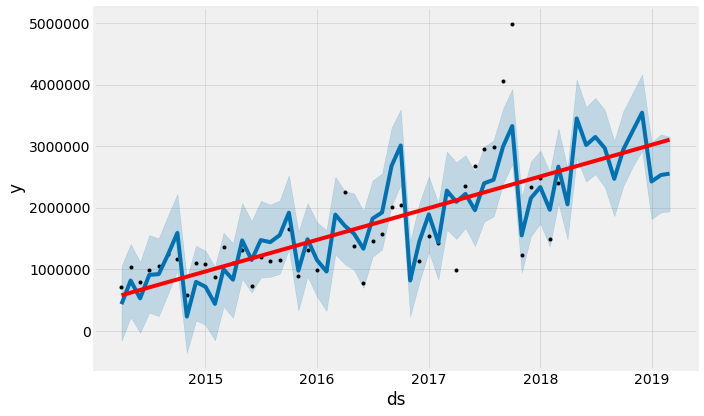

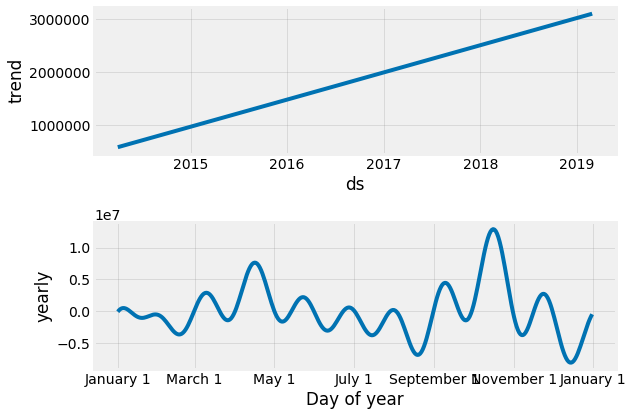

In [126]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [127]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,5.793810e+05,-1.583678e+05,1.050443e+06,5.793810e+05,5.793810e+05,-1.450744e+05,-1.450744e+05,-1.450744e+05,-1.450744e+05,-1.450744e+05,-1.450744e+05,0.0,0.0,0.0,4.343066e+05
1,2014-05-01,6.215748e+05,2.219976e+05,1.410194e+06,6.215748e+05,6.215748e+05,1.963875e+05,1.963875e+05,1.963875e+05,1.963875e+05,1.963875e+05,1.963875e+05,0.0,0.0,0.0,8.179624e+05
2,2014-06-01,6.651751e+05,-2.907004e+04,1.118777e+06,6.651751e+05,6.651751e+05,-1.362019e+05,-1.362019e+05,-1.362019e+05,-1.362019e+05,-1.362019e+05,-1.362019e+05,0.0,0.0,0.0,5.289732e+05
3,2014-07-01,7.073689e+05,2.965954e+05,1.555957e+06,7.073689e+05,7.073689e+05,2.029980e+05,2.029980e+05,2.029980e+05,2.029980e+05,2.029980e+05,2.029980e+05,0.0,0.0,0.0,9.103669e+05
4,2014-08-01,7.509692e+05,2.393387e+05,1.503545e+06,7.509692e+05,7.509692e+05,1.720866e+05,1.720866e+05,1.720866e+05,1.720866e+05,1.720866e+05,1.720866e+05,0.0,0.0,0.0,9.230557e+05
5,2014-09-01,7.945694e+05,6.105779e+05,1.881100e+06,7.945694e+05,7.945694e+05,4.535502e+05,4.535502e+05,4.535502e+05,4.535502e+05,4.535502e+05,4.535502e+05,0.0,0.0,0.0,1.248120e+06
6,2014-10-01,8.367632e+05,9.795978e+05,2.224674e+06,8.367632e+05,8.367632e+05,7.560421e+05,7.560421e+05,7.560421e+05,7.560421e+05,7.560421e+05,7.560421e+05,0.0,0.0,0.0,1.592805e+06
7,2014-11-01,8.803635e+05,-3.562978e+05,8.481830e+05,8.803635e+05,8.803635e+05,-6.470839e+05,-6.470839e+05,-6.470839e+05,-6.470839e+05,-6.470839e+05,-6.470839e+05,0.0,0.0,0.0,2.332796e+05
8,2014-12-01,9.225573e+05,1.712293e+05,1.384171e+06,9.225573e+05,9.225573e+05,-1.265927e+05,-1.265927e+05,-1.265927e+05,-1.265927e+05,-1.265927e+05,-1.265927e+05,0.0,0.0,0.0,7.959647e+05
9,2015-01-01,9.661576e+05,9.754348e+04,1.300771e+06,9.661576e+05,9.661576e+05,-2.489746e+05,-2.489746e+05,-2.489746e+05,-2.489746e+05,-2.489746e+05,-2.489746e+05,0.0,0.0,0.0,7.171830e+05


In [128]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

1128508747621.5542


In [129]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,1.585003e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",1.443596e+06,37.658553
"Alpha=0.2,SimpleExponentialSmoothing",1.443572e+06,39.153727
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",1.027847e+06,188.707600
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.266729e+06,32.162831
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",1.099512e+06,27.613087
"ARIMA(1,0,1)",2.761309e+01,42.222772
"SARIMA(0,0,0)(3,0,0)12",6.878549e+12,100.000000
Prophet,1.128509e+12,NaN


In [130]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(1,0,1)",2.761309e+01,42.222772
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",1.027847e+06,188.707600
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",1.099512e+06,27.613087
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.266729e+06,32.162831
"Alpha=0.2,SimpleExponentialSmoothing",1.443572e+06,39.153727
"Alpha=0.995,SimpleExponentialSmoothing",1.443596e+06,37.658553
Simple Average,1.585003e+06,NaN
Prophet,1.128509e+12,NaN
"SARIMA(0,0,0)(3,0,0)12",6.878549e+12,100.000000


In [131]:
import fbprophet

In [132]:
m = fbprophet.Prophet()

In [133]:
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [134]:
future = m.make_future_dataframe(periods=365)

In [135]:
forecast = m.predict(future)

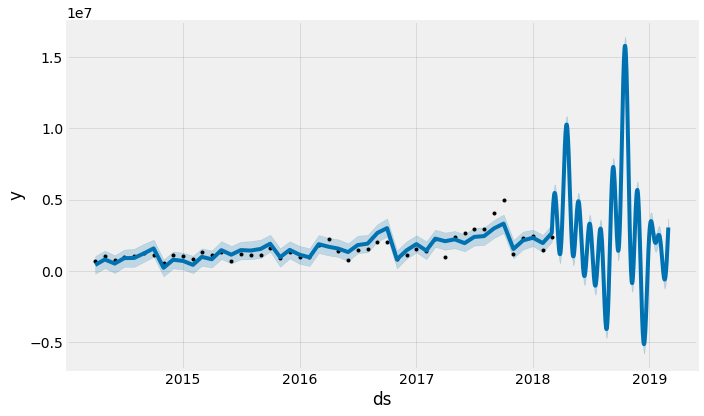

In [136]:
m.plot(forecast);

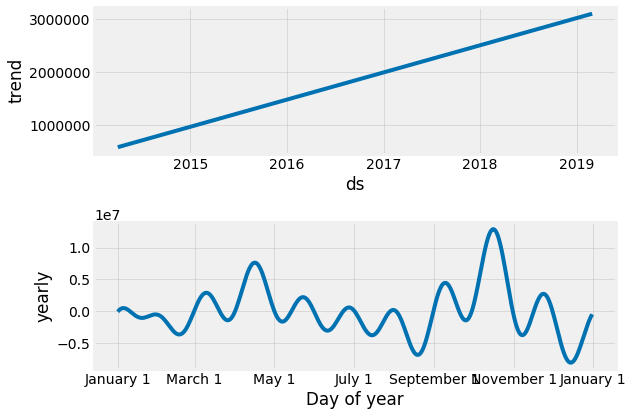

In [137]:
m.plot_components(forecast);

In [138]:
df_prophet.head()

,ds,y
Date,,
2014-04-01,2014-04-01,719991
2014-05-01,2014-05-01,1038494
2014-06-01,2014-06-01,788060
2014-07-01,2014-07-01,995257
2014-08-01,2014-08-01,1056341


In [139]:
future.tail()

,ds
408,2019-02-25
409,2019-02-26
410,2019-02-27
411,2019-02-28
412,2019-03-01


In [140]:
predict=m.predict(future)

In [141]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,5.793810e+05,-2.051350e+05,1.013686e+06,5.793810e+05,5.793810e+05,-1.450744e+05,-1.450744e+05,-1.450744e+05,-1.450744e+05,-1.450744e+05,-1.450744e+05,0.0,0.0,0.0,4.343066e+05
1,2014-05-01,6.215748e+05,2.006173e+05,1.389007e+06,6.215748e+05,6.215748e+05,1.963875e+05,1.963875e+05,1.963875e+05,1.963875e+05,1.963875e+05,1.963875e+05,0.0,0.0,0.0,8.179624e+05
2,2014-06-01,6.651751e+05,-1.056077e+05,1.122556e+06,6.651751e+05,6.651751e+05,-1.362019e+05,-1.362019e+05,-1.362019e+05,-1.362019e+05,-1.362019e+05,-1.362019e+05,0.0,0.0,0.0,5.289732e+05
3,2014-07-01,7.073689e+05,2.780924e+05,1.505284e+06,7.073689e+05,7.073689e+05,2.029980e+05,2.029980e+05,2.029980e+05,2.029980e+05,2.029980e+05,2.029980e+05,0.0,0.0,0.0,9.103669e+05
4,2014-08-01,7.509692e+05,3.483205e+05,1.530205e+06,7.509692e+05,7.509692e+05,1.720866e+05,1.720866e+05,1.720866e+05,1.720866e+05,1.720866e+05,1.720866e+05,0.0,0.0,0.0,9.230557e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2019-02-25,3.101672e+06,4.582360e+05,1.704529e+06,3.101557e+06,3.101784e+06,-1.977782e+06,-1.977782e+06,-1.977782e+06,-1.977782e+06,-1.977782e+06,-1.977782e+06,0.0,0.0,0.0,1.123890e+06
409,2019-02-26,3.103082e+06,9.634080e+05,2.151120e+06,3.102966e+06,3.103195e+06,-1.527079e+06,-1.527079e+06,-1.527079e+06,-1.527079e+06,-1.527079e+06,-1.527079e+06,0.0,0.0,0.0,1.576003e+06
410,2019-02-27,3.104492e+06,1.454113e+06,2.646659e+06,3.104376e+06,3.104605e+06,-1.047740e+06,-1.047740e+06,-1.047740e+06,-1.047740e+06,-1.047740e+06,-1.047740e+06,0.0,0.0,0.0,2.056751e+06
411,2019-02-28,3.105901e+06,1.921165e+06,3.112493e+06,3.105785e+06,3.106015e+06,-5.508374e+05,-5.508374e+05,-5.508374e+05,-5.508374e+05,-5.508374e+05,-5.508374e+05,0.0,0.0,0.0,2.555064e+06


In [142]:
predict[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-04-01,434306.583529,-205135.025051,1.013686e+06
1,2014-05-01,817962.365425,200617.264482,1.389007e+06
2,2014-06-01,528973.177890,-105607.676521,1.122556e+06
3,2014-07-01,910366.934643,278092.449398,1.505284e+06
4,2014-08-01,923055.718452,348320.494879,1.530205e+06


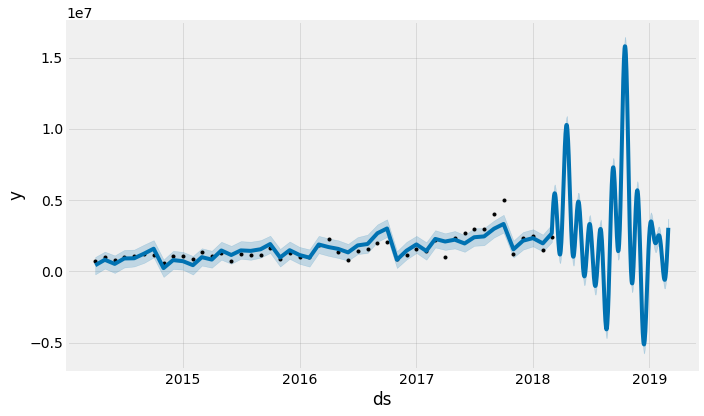

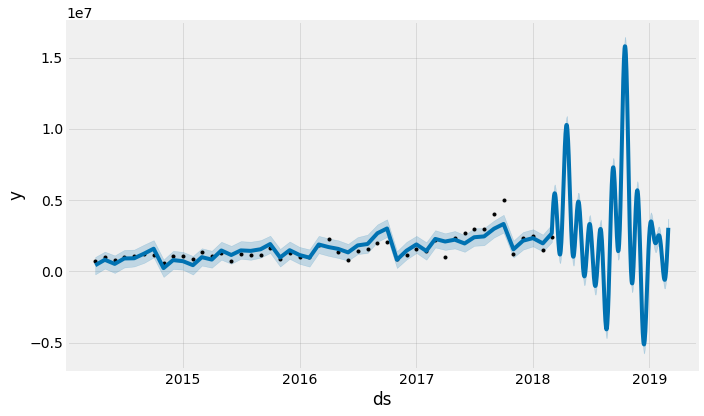

In [143]:
m.plot(predict)

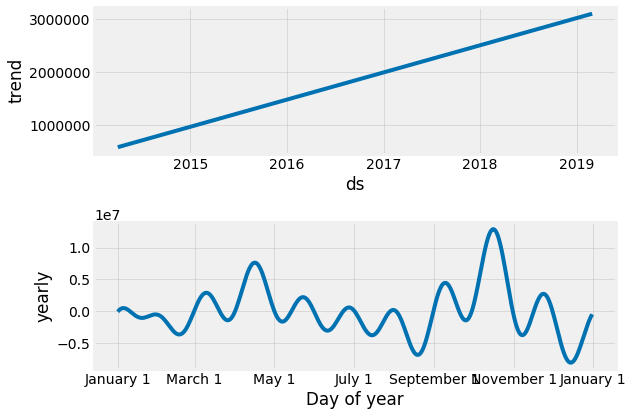

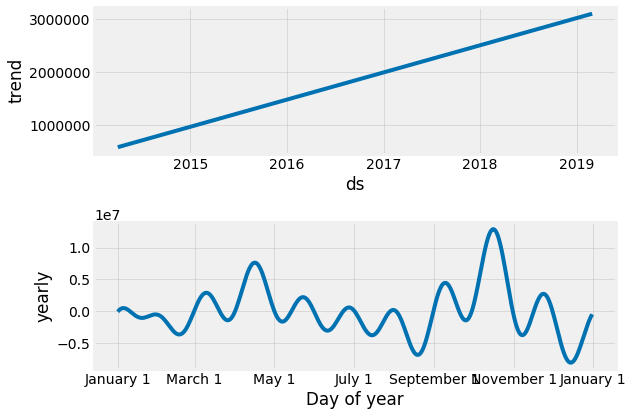

In [144]:
m.plot_components(predict)

In [145]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-09-02 00:00:00 and 2017-03-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [146]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-01,1.369355e+06,1.213876e+06,1.505009e+06,2045396,2016-09-02
1,2016-11-01,1.068735e+06,9.244807e+05,1.215334e+06,863705,2016-09-02
2,2016-12-01,1.579697e+06,1.429506e+06,1.717583e+06,1142563,2016-09-02
3,2017-01-01,1.830436e+06,1.671388e+06,1.966638e+06,1543478,2016-09-02
4,2017-02-01,7.066873e+05,5.640531e+05,8.459976e+05,1429819,2016-09-02


In [147]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,8.175638e+11,9.041923e+05,880721.150748,0.711520,0.711520,0.0
1,60 days,6.100669e+11,7.810678e+05,645215.785769,0.664953,0.664953,0.0
2,61 days,2.355209e+11,4.853049e+05,430007.187036,0.257610,0.257610,0.0
3,90 days,3.100454e+11,5.568172e+05,546059.267620,0.330213,0.330213,0.0
4,92 days,1.154577e+12,1.074512e+06,946246.120719,0.463377,0.463377,0.0


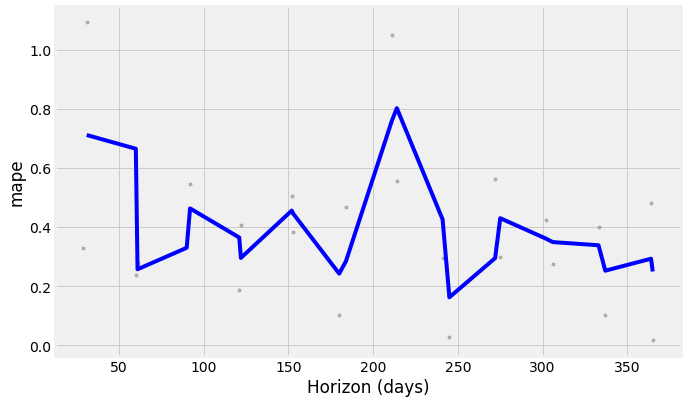

In [148]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [171]:
import statsmodels.api as sm 
arma_mod30 = sm.tsa.ARIMA(Mum_Dry['sales'], (1,0,1)).fit()

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


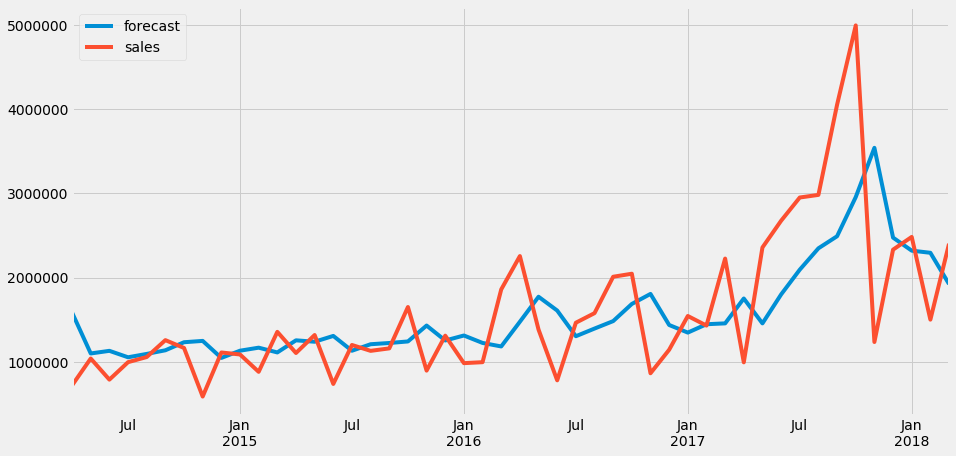

In [172]:
arma_mod30.plot_predict(dynamic=False)
plt.show()

In [173]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(Mum_Dry.sales, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                   48
Model:                     ARMA(1, 1)   Log Likelihood                -713.116
Method:                       css-mle   S.D. of innovations         680993.721
Date:                Sat, 21 Aug 2021   AIC                           1434.232
Time:                        10:12:57   BIC                           1441.717
Sample:                    04-01-2014   HQIC                          1437.061
                         - 03-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.584e+06   3.62e+05      4.371      0.000    8.74e+05    2.29e+06
ar.L1.sales     0.8847      0.100      8.809      0.000       0.688       1.081
ma.L1.sales    -0.5201      0.187     -2.787    

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [174]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = Mum_Dry.sales[:33]
test = Mum_Dry.sales[33:]

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


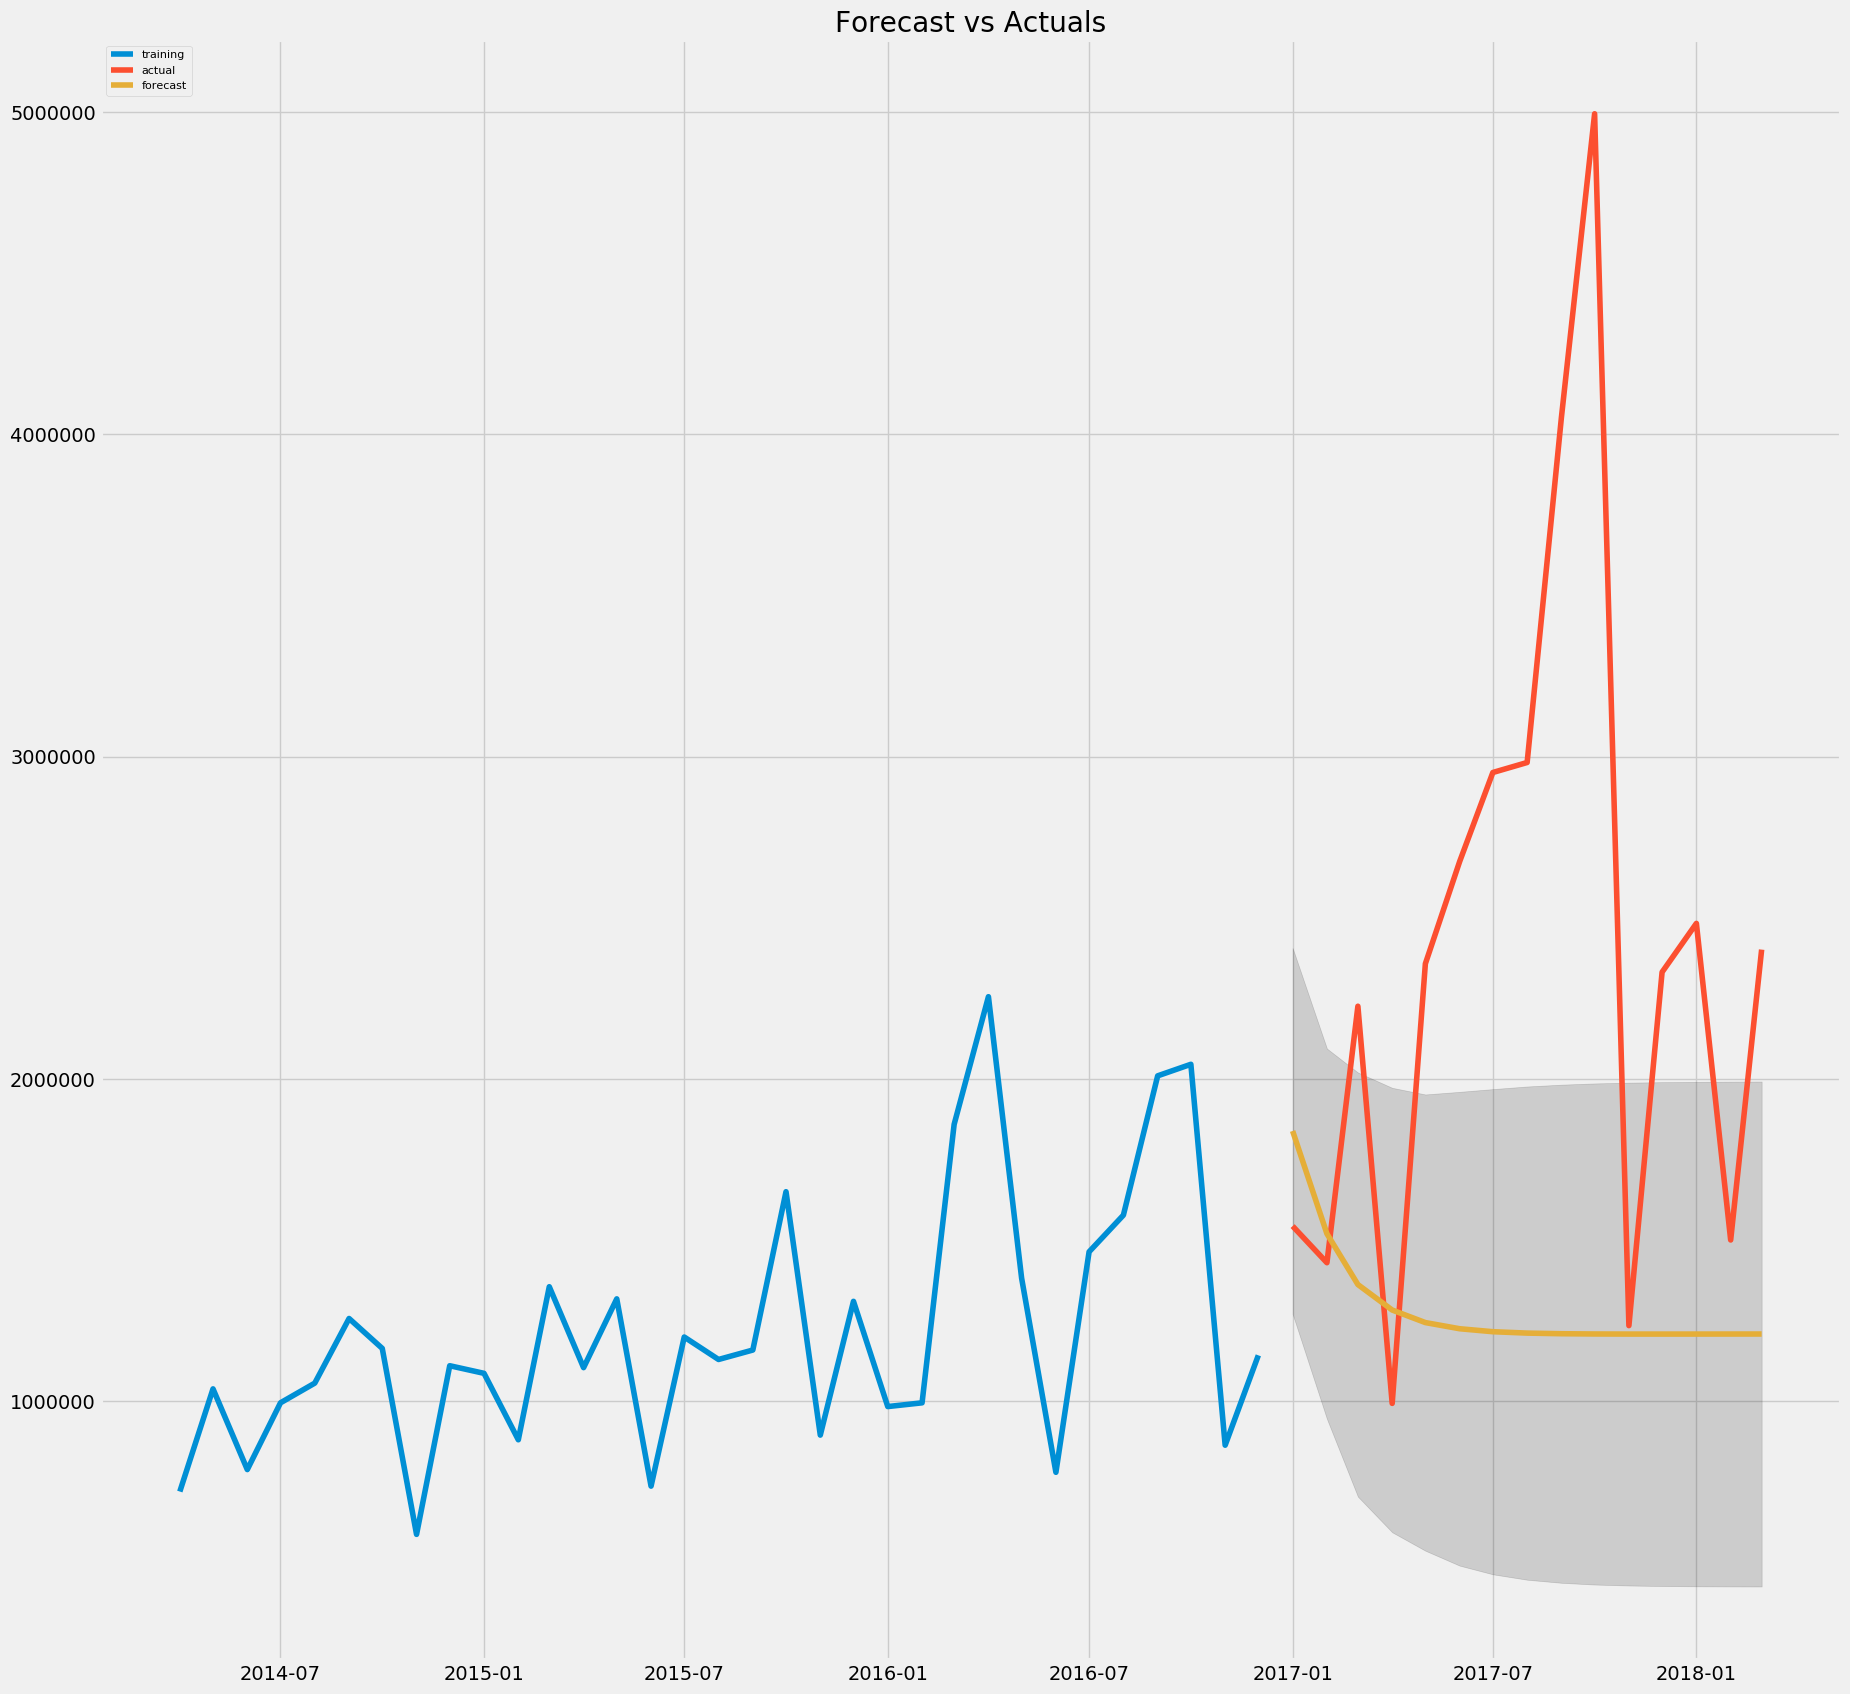

In [175]:
model = ARIMA(train, order=(3,0,3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,20), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()